<a href="https://colab.research.google.com/github/yutinghuang0413/MDSProject1/blob/main/%E3%80%8Cproject1_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
# your code here

# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
Shape of training data: (16512, 8)
Shape of testing data: (4128, 8)


In [ ]:
df = X.copy()
df["median house value"] = y
stats_df = pd.DataFrame({
    'Max': df.max(),
    'Min': df.min(),
    'Mean': df.mean(),
    'Median': df.median(),
    'Std': df.std()
})

print(stats_df)


                             Max         Min         Mean       Median  \
MedInc                 15.000100    0.499900     3.870671     3.534800   
HouseAge               52.000000    1.000000    28.639486    29.000000   
AveRooms              141.909091    0.846154     5.429000     5.229129   
AveBedrms              34.066667    0.333333     1.096675     1.048780   
Population          35682.000000    3.000000  1425.476744  1166.000000   
AveOccup             1243.333333    0.692308     3.070655     2.818116   
Latitude               41.950000   32.540000    35.631861    34.260000   
Longitude            -114.310000 -124.350000  -119.569704  -118.490000   
median house value      5.000010    0.149990     2.068558     1.797000   

                            Std  
MedInc                 1.899822  
HouseAge              12.585558  
AveRooms               2.474173  
AveBedrms              0.473911  
Population          1132.462122  
AveOccup              10.386050  
Latitude             

Intercept: -36.85856910680128
Coefficients: [ 0.43333341  0.00929324 -0.09864337  0.59321549 -0.00000756 -0.00474516
 -0.42144934 -0.43416604]
Training errors:
R^2: 0.6089
MAE: 0.5309
RMSE: 0.7235
Testing errors:
R^2: 0.5943
MAE: 0.5351
RMSE: 0.7273


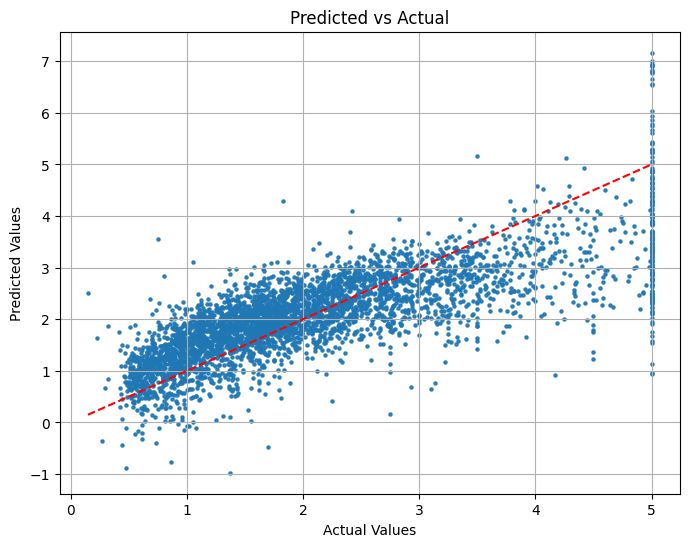

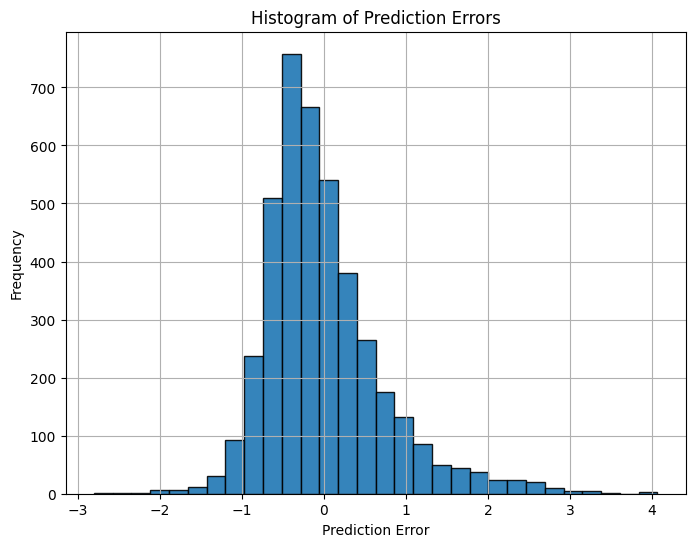

In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
print("Intercept:", model_lin.intercept_)
np.set_printoptions(precision=8, suppress=True)
print("Coefficients:", model_lin.coef_)

y_pred_lin = model_lin.predict(X_test)
y_train_lin = model_lin.predict(X_train)

r2_lin_in = r2_score(y_train, y_train_lin)
mae_lin_in = mean_absolute_error(y_train, y_train_lin)
rmse_lin_in = np.sqrt(mean_squared_error(y_train, y_train_lin))

print("Training errors:")
print(f"R^2: {r2_lin_in:.4f}")
print(f"MAE: {mae_lin_in:.4f}")
print(f"RMSE: {rmse_lin_in:.4f}")


r2_lin_out = r2_score(y_test, y_pred_lin)
mae_lin_out = mean_absolute_error(y_test, y_pred_lin)
rmse_lin_out = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print("Testing errors:")
print(f"R^2: {r2_lin_out:.4f}")
print(f"MAE: {mae_lin_out:.4f}")
print(f"RMSE: {rmse_lin_out:.4f}")

errors = y_test - y_pred_lin

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lin, alpha=0.9, s=5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.9)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.grid(True)
plt.show()

In [1]:
# Linear Regression + PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline_PCR = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('lr', LinearRegression())
])

param_grid = {
    'pca__n_components': list(range(1, X_train.shape[1]+1))
}

grid = GridSearchCV(pipeline_PCR, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print(f"Best number of principal components: {grid.best_params_['pca__n_components']}")

KeyboardInterrupt: 

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
# your code here